In [28]:
import pandas as pd
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns
from dataclasses import dataclass
from typing import *
import altair as alt

In [34]:
## Data Import
impf = pd.read_excel("impfkategorien.xlsx", skiprows=2)
impf.head()


,Zielgruppe,Priorität,Beschreibung,Grösse der Zielgruppe schweizweit laut BAG-Schätzung,Anteil an Summe P1-P4,Zürich,Bern,Waadt,Aargau,St. Gallen,...,Schwyz,Zug,Schaffhausen,Jura,Appenzell A. Rh.,Nidwalden,Glarus,Obwalden,Uri,Appenzell I. Rh.
0,1a i,P1,"Bewohner/innen von Alters- und Pflegeheimen, A...",141250.0,0.034219,25263.973976,17060.787764,13213.996797,11256.708666,8382.628500,...,2633.942956,2094.975990,1351.569881,1207.727184,910.013504,707.182827,666.199804,622.541478,602.402843,264.707328
1,1a ii,P1,"Bewohner/innen von Alters- und Pflegeheimen, A...",15610.0,0.003782,2792.004487,1885.443519,1460.322053,1244.015733,926.391723,...,291.085660,231.522656,149.366413,133.469886,100.568572,78.153090,73.623922,68.799097,66.573511,29.253674
2,1b i,P1,"Im eigenen Haushalt lebend, Alter ab 75 Jahre",633850.0,0.153556,113370.406406,76559.152736,59296.933593,50513.733011,37616.489026,...,11819.644196,9401.065706,6065.080136,5419.595579,4083.625202,3173.436001,2989.527405,2793.613562,2703.242777,1187.856565
3,1b ii,P1,"Im eigenen Haushalt lebend, Alter 65-74 Jahre",815100.0,0.197465,145788.780092,98451.314026,76252.947183,64958.182185,48372.959225,...,15199.482503,12089.309232,7799.395471,6969.334001,5251.341646,4080.882992,3844.385561,3592.449971,3476.237577,1527.525260
4,1c,P1,Personen bis 65 Jahre mit Vorerkrankungen,621600.0,0.150588,111179.371494,75079.544594,58150.940950,49537.487481,36889.500005,...,11591.213745,9219.377523,5947.864341,5314.854637,4004.703677,3112.105101,2931.750785,2739.623239,2650.998991,1164.899647


In [38]:
#impf["Beschreibung"].where(impf["Priorität"],"P1")
impf["Beschreibung"].loc[impf['Priorität'] == "P1"]

0    Bewohner/innen von Alters- und Pflegeheimen, A...
1    Bewohner/innen von Alters- und Pflegeheimen, A...
2        Im eigenen Haushalt lebend, Alter ab 75 Jahre
3        Im eigenen Haushalt lebend, Alter 65-74 Jahre
4            Personen bis 65 Jahre mit Vorerkrankungen
5    Pflege- und Betreuungspersonal Alters- und Pfl...
Name: Beschreibung, dtype: object

In [3]:
def set_sizes(fig_size:Tuple[int,int]=(9, 6), font_size:int=10):
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams["font.size"] = font_size
    plt.rcParams["xtick.labelsize"] = font_size
    plt.rcParams["ytick.labelsize"] = font_size
    plt.rcParams["axes.labelsize"] = font_size
    plt.rcParams["axes.titlesize"] = font_size
    plt.rcParams["legend.fontsize"] = font_size

In [4]:
impf_ = impf.groupby("Priorität").sum()
impf_plt = pd.DataFrame(impf_["Grösse der Zielgruppe schweizweit laut BAG-Schätzung"]).transpose()
impf_plt["AnzahlImpfungen"] = 0

In [44]:
df = impf_.drop(columns= ["Grösse der Zielgruppe schweizweit laut BAG-Schätzung"])

In [45]:
df

,Zürich,Bern,Waadt,Aargau,St. Gallen,Genf,Luzern,Tessin,Wallis,Freiburg,...,Schwyz,Zug,Schaffhausen,Jura,Appenzell A. Rh.,Nidwalden,Glarus,Obwalden,Uri,Appenzell I. Rh.
Priorität,,,,,,,,,,,,,,,,,,,,,
P1,420930.895542,284255.069245,220162.493472,187551.509674,139665.569832,137859.089836,112971.997574,96118.901044,94487.435762,87994.936811,...,43884.939414,34905.043848,22518.924420,20122.316686,15162.016861,11782.592127,11099.761284,10372.356381,10036.820360,4410.370781
P2,77124.428874,52082.206610,40338.941020,34363.842667,25590.013517,25259.023943,20699.123975,17611.240766,17312.317998,16122.739664,...,8040.751877,6395.424047,4125.995984,3686.881145,2778.037686,2158.847683,2033.737031,1900.459364,1838.981282,808.083539
P3,222358.742989,150159.089188,116301.881901,99074.974962,73779.000011,72824.718381,59677.993798,50775.265584,49913.436307,46483.742928,...,23182.427490,18438.755045,11895.728682,10629.709275,8009.407354,6224.210202,5863.501569,5479.246477,5301.997982,2329.799293
P4,17885.999275,12078.433815,9355.041980,7969.351268,5934.604248,5857.844143,4800.353426,4084.239510,4014.916048,3739.039811,...,1864.738376,1483.168842,956.863633,855.028095,644.257348,500.660409,471.645879,440.737329,426.479889,187.403418
Sonstige,554546.285667,374485.680432,290048.305532,247085.671692,183999.378060,181619.470141,148832.509808,126629.763035,124480.424456,115927.022423,...,57815.262331,45984.893534,29667.068933,26509.710016,19974.870513,15522.720638,14623.139943,13664.836118,13222.791459,5810.347401


([<matplotlib.axis.XTick at 0x29dee4950d0>,
 [Text(0, 0, 'P1'),
  Text(1, 0, 'P2'),
  Text(2, 0, 'P3'),
  Text(3, 0, 'P4'),
  Text(4, 0, 'Sonstige')])

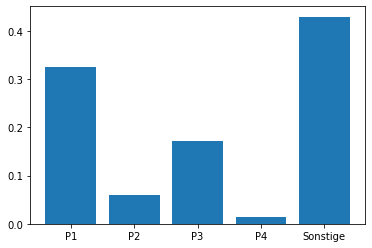

In [46]:
bars =('P1', 'P2', 'P3', 'P4', 'Sonstige')
y_pos = np.arange(len(n))
plt.bar(y_pos,list(df["Bern"]/df["Bern"].sum()))
plt.xticks(y_pos, bars)


In [47]:
st.bar_chart(df["Bern"])

In [54]:
df

,Zürich,Bern,Waadt,Aargau,St. Gallen,Genf,Luzern,Tessin,Wallis,Freiburg,...,Schwyz,Zug,Schaffhausen,Jura,Appenzell A. Rh.,Nidwalden,Glarus,Obwalden,Uri,Appenzell I. Rh.
Priorität,,,,,,,,,,,,,,,,,,,,,
P1,420930.895542,284255.069245,220162.493472,187551.509674,139665.569832,137859.089836,112971.997574,96118.901044,94487.435762,87994.936811,...,43884.939414,34905.043848,22518.924420,20122.316686,15162.016861,11782.592127,11099.761284,10372.356381,10036.820360,4410.370781
P2,77124.428874,52082.206610,40338.941020,34363.842667,25590.013517,25259.023943,20699.123975,17611.240766,17312.317998,16122.739664,...,8040.751877,6395.424047,4125.995984,3686.881145,2778.037686,2158.847683,2033.737031,1900.459364,1838.981282,808.083539
P3,222358.742989,150159.089188,116301.881901,99074.974962,73779.000011,72824.718381,59677.993798,50775.265584,49913.436307,46483.742928,...,23182.427490,18438.755045,11895.728682,10629.709275,8009.407354,6224.210202,5863.501569,5479.246477,5301.997982,2329.799293
P4,17885.999275,12078.433815,9355.041980,7969.351268,5934.604248,5857.844143,4800.353426,4084.239510,4014.916048,3739.039811,...,1864.738376,1483.168842,956.863633,855.028095,644.257348,500.660409,471.645879,440.737329,426.479889,187.403418
Sonstige,554546.285667,374485.680432,290048.305532,247085.671692,183999.378060,181619.470141,148832.509808,126629.763035,124480.424456,115927.022423,...,57815.262331,45984.893534,29667.068933,26509.710016,19974.870513,15522.720638,14623.139943,13664.836118,13222.791459,5810.347401


In [166]:
import altair as alt
from vega_datasets import data

source = data.barley()

alt.Chart(source).mark_bar().encode(
    x='sum(yield)',
    y='variety',
    color='site'
)

alt.Chart(...)

In [67]:
impf.head()

,Zielgruppe,Priorität,Beschreibung,Grösse der Zielgruppe schweizweit laut BAG-Schätzung,Anteil an Summe P1-P4,Zürich,Bern,Waadt,Aargau,St. Gallen,...,Schwyz,Zug,Schaffhausen,Jura,Appenzell A. Rh.,Nidwalden,Glarus,Obwalden,Uri,Appenzell I. Rh.
0,1a i,P1,"Bewohner/innen von Alters- und Pflegeheimen, A...",141250.0,0.0342191,25263.973976,17060.787764,13213.996797,11256.708666,8382.628500,...,2633.942956,2094.975990,1351.569881,1207.727184,910.013504,707.182827,666.199804,622.541478,602.402843,264.707328
1,1a ii,P1,"Bewohner/innen von Alters- und Pflegeheimen, A...",15610.0,0.00378167,2792.004487,1885.443519,1460.322053,1244.015733,926.391723,...,291.085660,231.522656,149.366413,133.469886,100.568572,78.153090,73.623922,68.799097,66.573511,29.253674
2,1b i,P1,"Im eigenen Haushalt lebend, Alter ab 75 Jahre",633850.0,0.153556,113370.406406,76559.152736,59296.933593,50513.733011,37616.489026,...,11819.644196,9401.065706,6065.080136,5419.595579,4083.625202,3173.436001,2989.527405,2793.613562,2703.242777,1187.856565
3,1b ii,P1,"Im eigenen Haushalt lebend, Alter 65-74 Jahre",815100.0,0.197465,145788.780092,98451.314026,76252.947183,64958.182185,48372.959225,...,15199.482503,12089.309232,7799.395471,6969.334001,5251.341646,4080.882992,3844.385561,3592.449971,3476.237577,1527.525260
4,1c,P1,Personen bis 65 Jahre mit Vorerkrankungen,621600.0,0.150588,111179.371494,75079.544594,58150.940950,49537.487481,36889.500005,...,11591.213745,9219.377523,5947.864341,5314.854637,4004.703677,3112.105101,2931.750785,2739.623239,2650.998991,1164.899647


In [59]:
source

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
...,...,...,...,...
115,58.16667,Wisconsin No. 38,1932,Waseca
116,47.16667,Wisconsin No. 38,1932,Morris
117,35.90000,Wisconsin No. 38,1932,Crookston
118,20.66667,Wisconsin No. 38,1932,Grand Rapids


In [63]:
impf_plt

Priorität,P1,P2,P3,P4,Sonstige,AnzahlImpfungen
Anzahl Impfungen,0.0,0.0,0.0,0.0,0.0,1000000
Anzahl Personen,2353410.0,431200.0,1243200.0,100000.0,3100449.0,0


In [65]:
impf_plt.transpose()

,Anzahl Impfungen,Anzahl Personen
Priorität,,
P1,0.0,2353410.0
P2,0.0,431200.0
P3,0.0,1243200.0
P4,0.0,100000.0
Sonstige,0.0,3100449.0
AnzahlImpfungen,1000000.0,0.0


In [205]:
source = data.wheat()
bars = alt.Chart(df).mark_bar().encode(
    x='sum(Vaccinations):Q',
    y='Site:N',
    color='Priority'
)

In [246]:
source = data.wheat()
bars = alt.Chart(df1).mark_bar().encode(
    x='Priorität',
    y='Schweiz')
bars



alt.Chart(...)

In [207]:
source.head()

,year,wheat,wages
0,1565,41.0,5.00
1,1570,45.0,5.05
2,1575,42.0,5.08
3,1580,49.0,5.12
4,1585,41.5,5.15


In [193]:
text = alt.Chart(df).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('sum(Vaccinations):Q', stack='zero'),
    y=alt.Y('Site:N'),
    detail='Priority:N',
    text=alt.Text('sum(Vaccinations):Q')
)

In [194]:
bars + text

alt.LayerChart(...)

In [32]:
df["Bern"]/df["Bern"].sum()

2021-01-09 20:58:53.701 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


Priorität
P1          0.325585
P2          0.059655
P3          0.171992
P4          0.013835
Sonstige    0.428934
Name: Bern, dtype: float64

In [211]:
impf_ = impf.groupby("Priorität").sum()
impf =impf_[["Grösse der Zielgruppe schweizweit laut BAG-Schätzung"]]
d1 = impf.rename(columns={"Priorität": "Priority","Grösse der Zielgruppe schweizweit laut BAG-Schätzung":"Vaccinations"}).reset_index()
#d1["Site"] = list(np.repeat("Anzahl Personen", 5))

In [219]:
df1 = impf_.reset_index()


In [244]:
df1['Schweiz'] = df1["Bern"]/df1["Bern"].sum()

In [185]:
d2 = pd.DataFrame({'Priority': ["P1","P2","P3","P4","Sonstige"], 'Vaccinations': [0,0,0,0,1000000], "Site" : list(np.repeat("Anzahl Impfungen", 5))})
d2

,Priority,Vaccinations,Site
0,P1,0,Anzahl Impfungen
1,P2,0,Anzahl Impfungen
2,P3,0,Anzahl Impfungen
3,P4,0,Anzahl Impfungen
4,Sonstige,1000000,Anzahl Impfungen


In [186]:
df = pd.concat([d1, d2])

In [187]:
df

,Priority,Vaccinations,Site
0,P1,2353410.0,Anzahl Personen
1,P2,431200.0,Anzahl Personen
2,P3,1243200.0,Anzahl Personen
3,P4,100000.0,Anzahl Personen
4,Sonstige,3100449.0,Anzahl Personen
0,P1,0.0,Anzahl Impfungen
1,P2,0.0,Anzahl Impfungen
2,P3,0.0,Anzahl Impfungen
3,P4,0.0,Anzahl Impfungen
4,Sonstige,1000000.0,Anzahl Impfungen


In [61]:
impf_plt = pd.DataFrame(np.array([[0,0,0,0,0,1000000]]), columns=['P1', 'P2', 'P3', 'P4', 'Sonstige', 'AnzahlImpfungen']).append(impf_plt, ignore_index=True)
impf_plt = impf_plt.rename(index={0: "Anzahl Impfungen",1: "Anzahl Personen"})

In [62]:
impf_plt

Priorität,P1,P2,P3,P4,Sonstige,AnzahlImpfungen
Anzahl Impfungen,0.0,0.0,0.0,0.0,0.0,1000000
Anzahl Personen,2353410.0,431200.0,1243200.0,100000.0,3100449.0,0


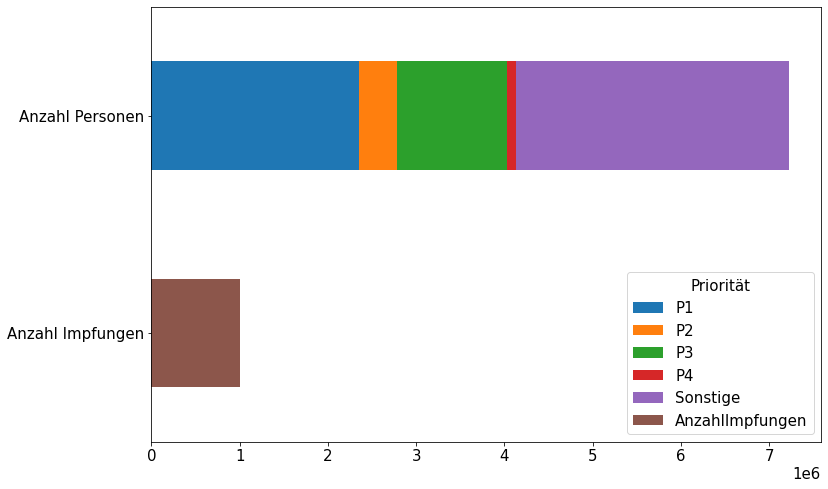

In [11]:
set_sizes((12,8), 15)
impf_plt.plot.barh(stacked=True)

plt.show()

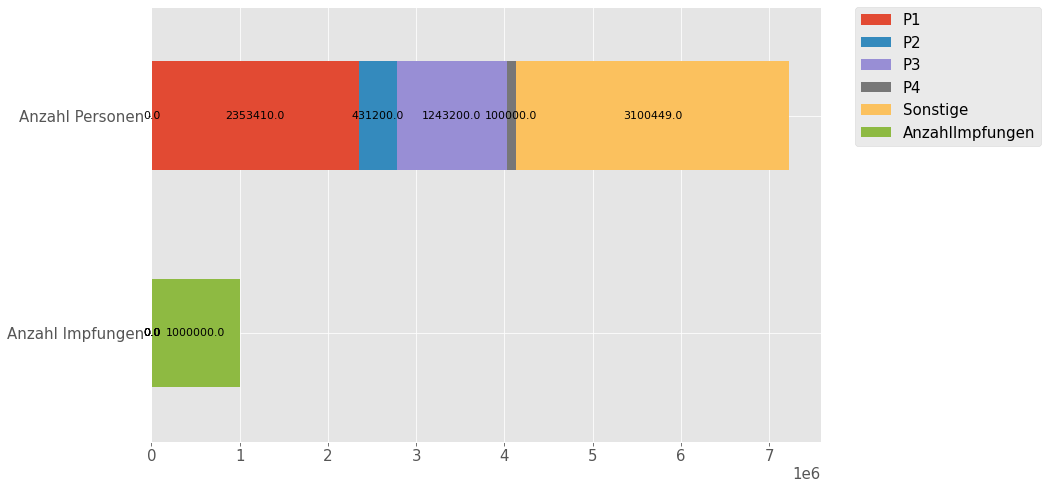

In [12]:
plt.style.use('ggplot')

ax = impf_plt.plot(stacked=True, kind='barh', figsize=(12, 8), rot='horizontal')

for rect in ax.patches:

    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{width}'  
    
    # ax.text(x, y, text)
    label_x = x + width /2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0.4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=11)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    

plt.show()

<ipython-input-13-9beb1e3ea652>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mio)


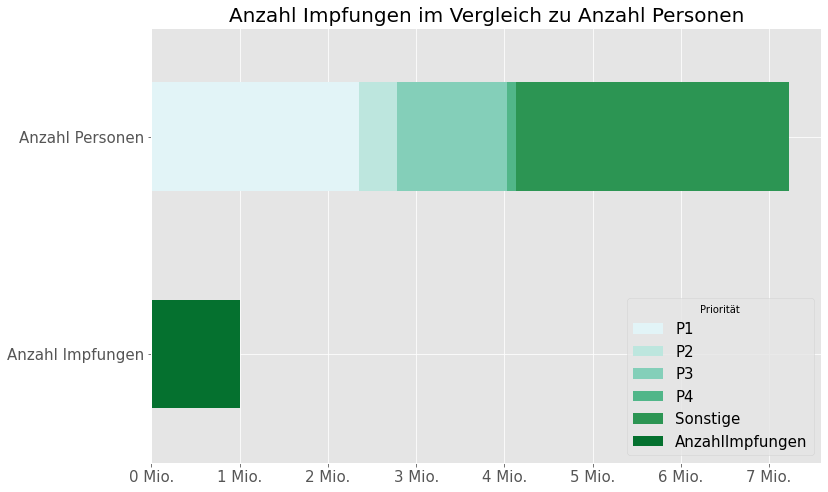

In [13]:
pal = sns.color_palette("BuGn")
ax = impf_plt.plot(kind='barh', stacked=True, color= pal)
plt.title("Anzahl Impfungen im Vergleich zu Anzahl Personen", fontsize=20)
mio = ["0 Mio.", "1 Mio.", "2 Mio.", "3 Mio.", "4 Mio.", "5 Mio.", "6 Mio.", "7 Mio."]
ax.set_xticklabels(mio)
plt.show()

In [199]:
df_dummy = pd.read_excel("dummy_data.xlsx")
df_dummy.head()


,country,date,source,manufacturer,type,effectiveness,ordered,people,necessary doses,status,shipping_date,shipping_volume,shipping_volume_cumulated,estimation?
0,ch,2020-12-20,https://www.srf.ch/news/schweiz/covid-impfung-...,Pfizer/Biontech,Comirnaty® (BNT162b2),0.900,3000000,1500000,2,approved,2020-12-20,107000,107000,no
1,ch,2021-01-05,https://www.srf.ch/news/schweiz/covid-impfung-...,Pfizer/Biontech,Comirnaty® (BNT162b2),0.900,3000000,1500000,2,approved,2021-01-31,500000,607000,yes
2,ch,2021-01-05,https://www.srf.ch/news/schweiz/covid-impfung-...,Pfizer/Biontech,Comirnaty® (BNT162b2),0.900,3000000,1500000,2,approved,2021-02-28,500000,1107000,yes
3,ch,2021-01-05,https://www.srf.ch/news/schweiz/covid-impfung-...,Pfizer/Biontech,Comirnaty® (BNT162b2),0.900,3000000,1500000,2,approved,2021-03-31,500000,1607000,yes
4,ch,2020-12-23,https://www.srf.ch/news/schweiz/covid-impfung-...,Moderna,NaN,0.941,4500000,2250000,2,ongoing,2021-01-08,107000,107000,NaN


In [43]:
df.groupby("manufacturer").count().reset_index()["manufacturer"].tolist()



['Moderna', 'Pfizer/Biontech']

In [201]:
alt.Chart(df_dummy).transform_filter(
   alt.datum.shipping_volume_cumulated > 0  
).mark_line().encode(
    x=alt.X('shipping_date', type='nominal', title='Date'),
    y=alt.Y('sum(shipping_volume_cumulated):Q',  title='Shipping Volume'),
    color='manufacturer',
    tooltip = 'sum(shipping_volume_cumulated)',
).properties(
    width=1500,
    height=600
).configure_axis(
    labelFontSize=17,
    titleFontSize=20
)

alt.Chart(...)

### Create a map

In [42]:
import geopandas as gpd
map_df = gpd.read_file('data/CHE_adm1.shp')
plz_shape_df.head()

map_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,223,CHE,Switzerland,1,Aargau,Canton|Kanton|Chantun,Canton,None,Argovia|Arg¢via|Argovie,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ..."
1,223,CHE,Switzerland,2,Appenzell Ausserrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Ausser-Rhoden|Appenzell Outer Rhodes...,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ..."
2,223,CHE,Switzerland,3,Appenzell Innerrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Inner-Rhoden|Appenzell Inner Rhodes|...,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3..."
3,223,CHE,Switzerland,4,Basel-Landschaft,Canton|Kanton|Chantun,Canton,None,Bâle-Campagne|Basel-Country|Baselland|Basel-La...,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4..."
4,223,CHE,Switzerland,5,Basel-Stadt,Canton|Kanton|Chantun,Canton,None,Bâle-Ville|Basel-City|Basel-Town|Basilea-Citad...,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ..."
5,223,CHE,Switzerland,6,Bern,Canton|Kanton|Chantun,Canton,None,Berna|Berne,"MULTIPOLYGON (((7.09284 46.89419, 7.09202 46.8..."
6,223,CHE,Switzerland,7,Fribourg,Canton|Kanton|Chantun,Canton,None,Freiburg|Friburg|Friburgo,"MULTIPOLYGON (((6.78581 46.74974, 6.78684 46.7..."
7,223,CHE,Switzerland,8,Genève,Canton|Kanton|Chantun,Canton,None,Cenevre|Genebra|Geneve|Geneva|Genevra|Genf|Gin...,"MULTIPOLYGON (((6.18406 46.34775, 6.18559 46.3..."
8,223,CHE,Switzerland,9,Glarus,Canton|Kanton|Chantun,Canton,None,Glaris|Glarona|Glaruna,"POLYGON ((9.07083 47.13050, 9.07307 47.12995, ..."
9,223,CHE,Switzerland,10,Graubünden,Canton|Kanton|Chantun,Canton,None,Graubünden|Grigioni|Grischun|Grisons,"MULTIPOLYGON (((10.22766 46.61207, 10.22734 46..."


In [55]:
map_dummy = pd.read_excel("mapdata_dummy.xlsx")

In [54]:
map_df["NAME_1"]

0                     Aargau
1     Appenzell Ausserrhoden
2      Appenzell Innerrhoden
3           Basel-Landschaft
4                Basel-Stadt
5                       Bern
6                   Fribourg
7                     Genève
8                     Glarus
9                 Graubünden
10                      Jura
11                   Lucerne
12                 Neuchâtel
13                 Nidwalden
14                  Obwalden
15              Sankt Gallen
16              Schaffhausen
17                    Schwyz
18                 Solothurn
19                   Thurgau
20                    Ticino
21                       Uri
22                    Valais
23                      Vaud
24                    Zürich
25                       Zug
Name: NAME_1, dtype: object

In [60]:
map_dummy

,NAME_1,P1
0,Zürich,25264
1,Bern,17061
2,Waadt,13214
3,Aargau,11257
4,Sankt Gallen,8383
5,Genève,8274
6,Lucerne,6780
7,Tessin,5769
8,Wallis,5671
9,Fribourg,5281


In [50]:
map_dummy.head()

,NAME_1,P1
0,Zürich,25264
1,Bern,17061
2,Waadt,13214
3,Aargau,11257
4,St. Gallen,8383


<AxesSubplot:>

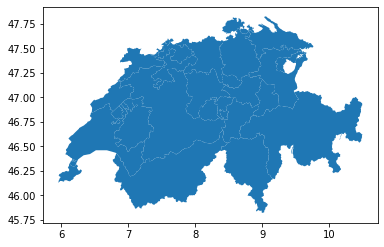

In [59]:
merge.plot()

In [58]:
merge=pd.merge(map_df,map_dummy,on='NAME_1')

Text(0.5, 1.0, '2020 Jan-May Confirmed Case Amount in Different Countries')

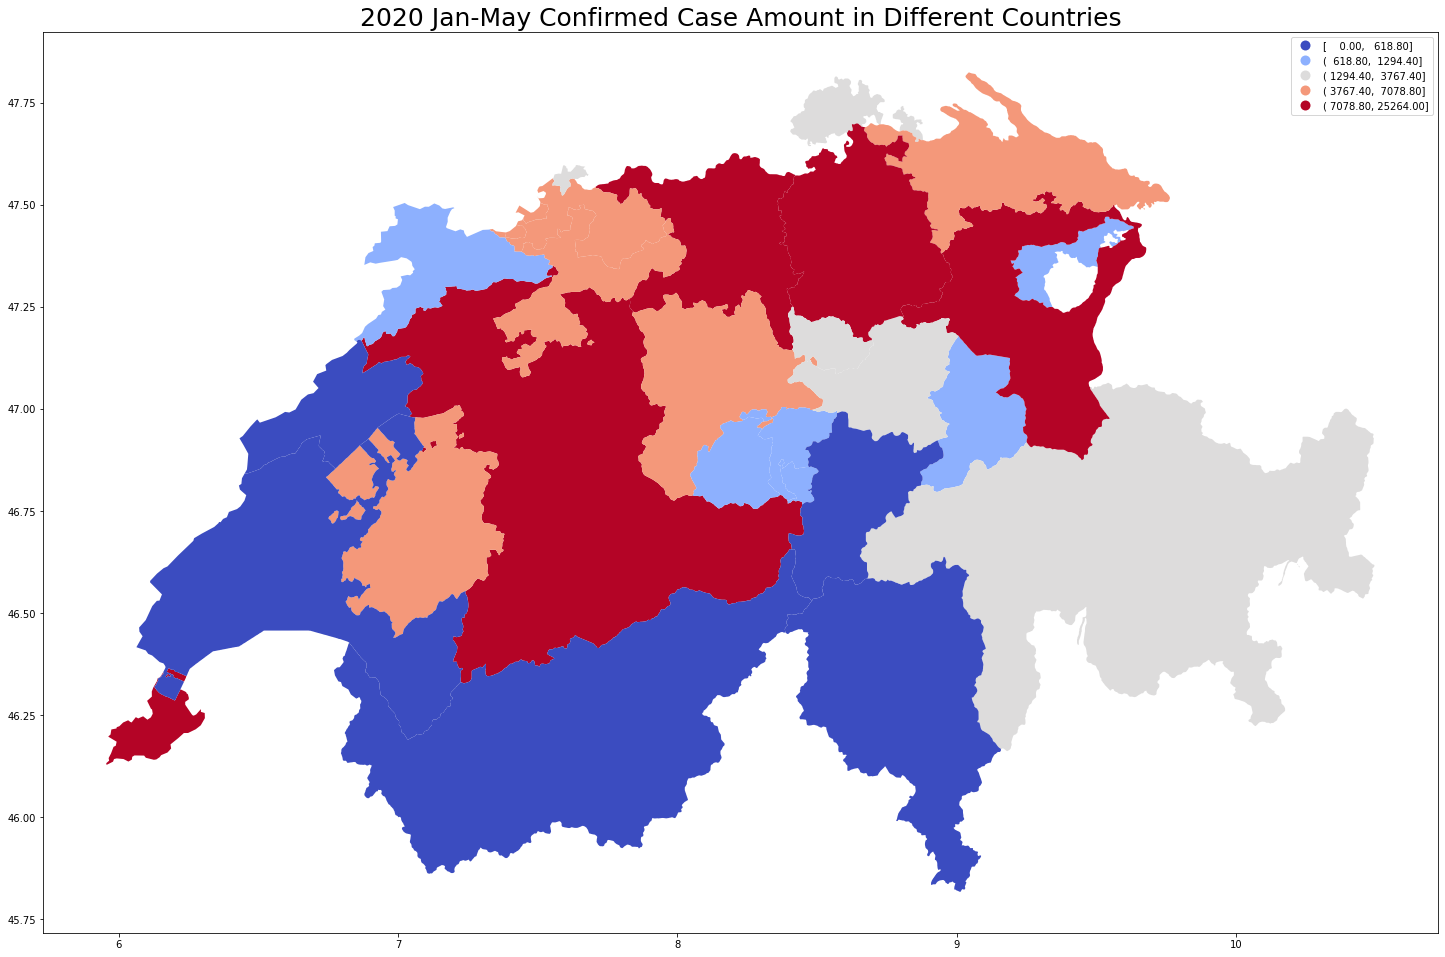

In [62]:
merge.plot(column='P1', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)

In [ ]:
df = gpd.read_file('data/CHE_adm2.shp)

In [44]:
impf.loc[0].head()

Zielgruppe                                                                                           1a i
Priorität                                                                                              P1
Beschreibung                                            Bewohner/innen von Alters- und Pflegeheimen, A...
Grösse der Zielgruppe schweizweit laut BAG-Schätzung                                        141250.000000
Anteil an Summe P1-P4                                                                            0.034219
Name: 0, dtype: object

In [37]:
impf.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Zielgruppe,1a i,1a ii,1b i,1b ii,1c,2a,2b,2c,2d,2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Priorität,P1,P1,P1,P1,P1,P1,P2,P2,P2,P2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beschreibung,"Bewohner/innen von Alters- und Pflegeheimen, A...","Bewohner/innen von Alters- und Pflegeheimen, A...","Im eigenen Haushalt lebend, Alter ab 75 Jahre","Im eigenen Haushalt lebend, Alter 65-74 Jahre",Personen bis 65 Jahre mit Vorerkrankungen,Pflege- und Betreuungspersonal Alters- und Pfl...,Pflege- und Betreuungspersonal Heime für Behin...,Personal Krankenhäuser und Spezialkliniken,Pflegepersonal Spitex,Personal Arztpraxen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grösse der Zielgruppe schweizweit laut BAG-Schätzung,141250.000000,15610.000000,633850.000000,815100.000000,621600.000000,126000.000000,46000.000000,168500.000000,30100.000000,135900.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anteil an Summe P1-P4,0.034219,0.003782,0.153556,0.197465,0.150588,0.030525,0.011144,0.040821,0.007292,0.032923,...,NaN,NaN,NaN,NaN,60000,NaN,NaN,NaN,NaN,NaN
Zürich,25263.973976,2792.004487,113370.406406,145788.780092,111179.371494,22536.359087,8227.559667,30137.908779,5383.685782,24307.073015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bern,17060.787764,1885.443519,76559.152736,98451.314026,75079.544594,15218.826607,5556.079555,20352.160978,3635.608578,16414.591555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waadt,13213.996797,1460.322053,59296.933593,76252.947183,58150.940950,11787.352895,4303.319311,15763.245737,2815.867636,12713.502051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aargau,11256.708666,1244.015733,50513.733011,64958.182185,49537.487481,10041.382598,3665.901583,13428.356886,2398.774732,10830.348373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
St. Gallen,8382.628500,926.391723,37616.489026,48372.959225,36889.500005,7477.601352,2729.917954,9999.808158,1786.315879,8065.127173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
